In [153]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# **Generate a population of random numbers**

In [154]:
# Create 230,000 random numbers in a 1/f distribution


randint = np.logspace(np.log10(0.001),np.log10(100),230000)

fdist = np.zeros(230000)

for i in range(len(randint)):
  fdist[i] = 1/randint[i]
  if fdist[i]< 0:
    print(fdist[i])

fdist[:40]

array([1000.        ,  999.94994484,  999.89989218,  999.84984203,
        999.79979438,  999.74974924,  999.69970661,  999.64966647,
        999.59962885,  999.54959373,  999.49956111,  999.449531  ,
        999.39950339,  999.34947828,  999.29945568,  999.24943558,
        999.19941799,  999.1494029 ,  999.09939032,  999.04938023,
        998.99937266,  998.94936758,  998.89936501,  998.84936494,
        998.79936737,  998.7493723 ,  998.69937974,  998.64938968,
        998.59940213,  998.54941707,  998.49943452,  998.44945447,
        998.39947692,  998.34950187,  998.29952932,  998.24955928,
        998.19959173,  998.14962669,  998.09966415,  998.04970411])

In [155]:
# Only take every 1000th entry in fdist
fdist1000 = fdist[0::1000]

fdist1000[:40]

array([1000.        ,  951.17576211,  904.73533043,  860.56231743,
        818.54601812,  778.58113261,  740.56750218,  704.40985828,
        670.01758379,  637.30448589,  606.18858006,  576.59188462,
        548.44022528,  521.66304926,  496.19324844,  471.96699124,
        448.92356258,  427.00521177,  406.15700773,  386.32670137,
        367.4645946 ,  349.52341581,  332.45820141,  316.2261831 ,
        300.78668071,  286.10100026,  272.13233696,  258.845683  ,
        246.2077398 ,  234.18683454,  222.75284082,  211.87710313,
        201.53236504,  191.69270091,  182.33345088,  173.4311591 ,
        164.96351493,  156.90929703,  149.24832019,  141.9613847 ])

In [156]:
#Sort the array in descending order
fdist1000[::-1].sort()
fdist1000[1]

951.1757621112006

In [157]:
#Create index
index = np.zeros(len(fdist1000))

for i in range(len(fdist1000)):
  index[i] = i+1

index[:40]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

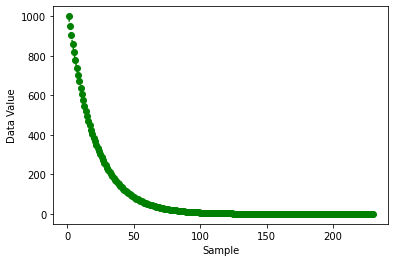

In [158]:
# Graphing the random numbers 

plt.plot(index,fdist1000, 'go--')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

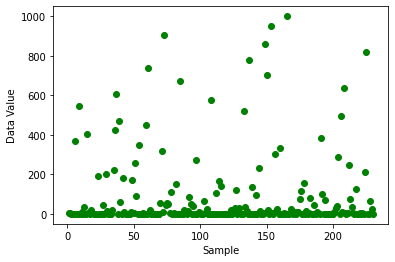

In [159]:
# Shuffle fdist1000

shuffledist = fdist1000.copy()

np.random.shuffle(shuffledist)

plt.plot(index,shuffledist, 'go')
plt.xlabel('Sample')
plt.ylabel('Data Value')
plt.show()

# **Monte Carlo sampling**

In [160]:
### Randomly select 50 of the 230000 data points. Find the mean. Repeat this 500 times. ###
### Basically do 500 iterations of 50 random points and find the average of each batch of 50. ###

mean = np.zeros(500)

for i in range(len(mean)):
  fifty  =  np.random.choice(fdist, size=50, replace=False)
  mean[i] = np.mean(fifty) 

mean[:100]


array([ 67.98615175, 102.13576835,  82.02364419,  84.61018541,
        76.97495128,  98.02358465, 101.35134696,  90.18122637,
       112.56487335, 131.0408085 ,  80.5281592 ,  51.92483619,
        52.32871296,  90.42711967,  80.30171327,  72.77608872,
        74.33783128,  86.41819578,  79.87691501, 150.11087798,
       100.58068111,  67.4115929 ,  67.51035677,  94.9751637 ,
        75.81307397,  62.71026847, 128.42059384,  54.91634699,
        48.76401188, 148.81596306,  96.46867094,  51.80815828,
        52.85234769,  85.28826867,  92.1827875 ,  25.74951461,
       111.08175435, 102.62169403,  57.63775877, 105.33243057,
       109.78102376, 108.34206783,  74.70598939, 162.08843442,
       101.15028576,  86.51021921,  85.85916168,  99.2537638 ,
       100.08320555, 101.07504602,  70.23180519,  66.03913777,
        97.90259773,  68.02442645,  44.78942232, 134.15474704,
       117.42070833,  92.44970087,  58.95719196, 106.12503137,
        50.25021338,  73.65811179, 100.41587604,  95.04

In [161]:
# Calculate real average 

realmean = sum(fdist)/len(fdist)

print(realmean)

86.85982410100492


In [162]:
# Create index for mean to plot
meanindex = np.zeros(len(mean))

for i in range(len(mean)):
  meanindex[i] = i+1

meanindex[:40]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40.])

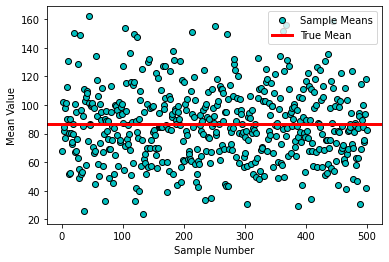

In [163]:
# Plot Monte-Carlo sampling 

plt.plot(meanindex,mean, 'ko',markerfacecolor='c' , label = 'Sample Means')
plt.axhline(y=realmean, color='r', linewidth='3', linestyle='-', label = 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# **Cumulative averaging**

In [182]:
# Cumulative average of all sample means

cumemean = np.zeros(500)
cumesum = np.zeros(500)
length = len(mean)

for i in range(length):
  cumesum[i] = np.sum(mean[:i+1])
  #if i == 0:
    #cumemean[i] = cumesum[i]/(i+1)
  #else:
  cumemean[i] = cumesum[i] / (i+1)



In [183]:
# Create index for cumulative mean to plot
cumemeanindex = np.zeros(len(cumemean))

for i in range(len(cumemean)):
  cumemeanindex[i] = i+1

cumemeanindex[-1]

500.0

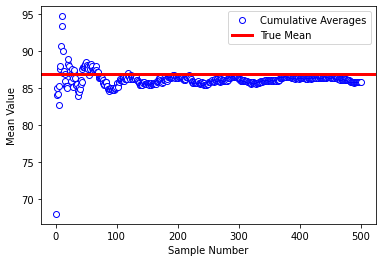

In [184]:
# Plot of Cumulative Average

plt.plot(cumemeanindex,cumemean, 'bo',markerfacecolor='w' , label = 'Cumulative Averages')
plt.axhline(y=realmean, color='r', linewidth='3', linestyle='-', label = 'True Mean')
plt.xlabel('Sample Number')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

In [321]:
### Compute the square divergence for each point. Repeat 100 times ###

dfdivergence = pd.DataFrame(cumemean, columns = ['Original Cumulative Mean Run 1'])


In [322]:
# Find the square divergence from mean (realmean) for the first run

divergence1 = (dfdivergence["Original Cumulative Mean Run 1"] - realmean)**2

In [323]:
divergence1[:20]

0     356.215508
1       3.235912
2       7.903423
3       7.133636
4      16.922395
5       2.456878
6       0.528085
7       1.104671
8      14.366892
9      61.299974
10     42.798519
11      9.521157
12      0.036880
13      0.187602
14      0.001086
15      0.830150
16      2.541213
17      2.341178
18      3.301785
19      2.063031
Name: Original Cumulative Mean Run 1, dtype: float64

In [324]:
dfdivergence['Square Divergence 1'] = divergence1

In [325]:
dfdivergence


,Original Cumulative Mean Run 1,Square Divergence 1
0,67.986152,356.215508
1,85.060960,3.235912
2,84.048521,7.903423
3,84.188937,7.133636
4,82.746140,16.922395
...,...,...
495,85.753484,1.223988
496,85.770034,1.187643
497,85.834876,1.050519
498,85.746245,1.240058


In [308]:
dfmeans = pd.DataFrame()

for i in range(99):
  dfmeans[i] = np.zeros(500)



In [310]:
# (Sampling 50 random point 500 times) for 100 runs. 
for i in range(99):
  for j in range(500):
    dffifty  =  np.random.choice(fdist, size=50, replace=False)
    tempmean = np.mean(dffifty) 
    dfmeans.at[j, i] =  tempmean


In [311]:
dfmeans[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,79.282331,40.300155,92.920175,132.611879,161.980597,87.671812,123.258476,121.258037,72.275761,33.639322,73.729280,92.489031,127.781269,59.024159,27.423075,64.105606,100.308423,78.926966,59.705859,38.397446,88.042406,95.434308,87.646559,97.750672,72.665627,63.433345,76.737200,106.085052,97.646848,90.367471,89.589952,67.360953,108.614274,63.955874,114.198926,67.791203,91.085916,79.536615,79.468459,69.228213,...,80.892563,63.503999,47.428670,70.984282,92.218528,52.360200,57.878370,110.780069,107.342780,46.742884,100.226764,110.616174,83.440125,64.418689,62.444176,55.106842,57.280266,45.964489,109.848029,65.038620,69.762909,106.517393,63.652002,60.868446,101.424168,80.873221,44.052587,100.490030,119.717835,172.655020,95.606600,114.143933,73.615084,105.989696,88.645888,73.278721,50.744039,128.064236,135.963786,41.337636
1,102.828931,100.902448,71.016304,114.938378,21.499256,85.301722,111.732558,164.814450,106.046784,103.778225,92.607287,58.537651,53.959709,53.498149,69.571272,69.209078,88.079121,83.530565,131.254479,117.747632,86.525285,65.690794,155.884422,99.132337,82.430863,103.036686,95.314599,68.934428,81.919069,58.061903,111.252505,100.183355,74.189681,69.209044,57.693175,73.818704,87.988863,79.471568,45.522961,64.738348,...,45.330121,39.811514,86.112494,61.584362,133.067697,56.825079,68.107294,121.612556,78.323572,42.634223,120.494190,78.851479,70.904655,59.728108,105.709093,48.021308,64.976425,89.471491,87.516036,111.481548,129.603997,99.183410,120.598629,31.588703,56.155276,89.031358,91.901224,116.673257,84.678695,80.549704,66.934269,146.513829,78.447442,96.701515,88.270794,132.464242,98.856134,80.677582,68.433098,60.807371
2,85.701826,114.292616,121.854187,98.640610,86.645241,113.394847,100.632998,86.495653,65.254683,125.354845,99.057662,116.824014,97.589183,70.805087,67.443715,97.847990,79.530957,54.214023,53.719042,83.362256,67.864439,119.111013,76.581896,78.406138,80.471553,67.256671,73.966779,116.930445,89.160127,94.786751,113.658931,89.794949,80.759157,87.929651,102.889016,60.380799,99.643820,85.121498,59.945933,101.295380,...,98.036201,116.425164,62.360793,125.132411,138.898752,90.105755,96.821547,100.958550,95.023092,45.408470,54.540375,164.351639,91.705522,63.886549,87.426928,73.926092,46.417153,83.332259,134.403637,78.456519,24.150941,123.522924,75.669776,55.770428,109.929811,102.910696,86.956498,29.542076,90.200781,46.020409,77.576848,56.622588,92.283851,124.737816,120.055208,141.470431,81.604616,116.317451,70.195984,97.864151
3,126.260655,78.167666,92.359429,61.611772,70.240927,88.130058,55.334638,135.535485,88.222916,77.745758,65.791386,89.559966,58.014214,108.432778,121.697905,116.915110,68.313947,83.606465,101.861761,147.122304,95.766961,96.935610,102.248608,72.507204,82.114064,108.676521,95.564232,73.822043,115.617157,48.748053,66.164349,83.465157,105.872628,106.419380,110.443655,80.726173,118.461864,97.879129,46.762585,66.766332,...,86.823083,40.078561,68.512571,28.264120,54.649107,93.755853,77.174931,96.431722,141.667223,152.299082,60.897955,47.123997,101.850771,37.285551,99.152299,65.829131,65.578929,104.369553,113.246070,51.998590,82.226958,102.600970,88.841499,88.410978,65.184256,46.280582,138.883479,75.053013,61.888363,67.112058,56.203637,111.788581,74.982094,66.793328,72.677798,100.653346,90.465955,102.109600,115.170699,170.199164
4,80.648536,121.133815,100.395637,110.656796,56.114300,63.926393,85.428735,87.088755,105.061501,95.339147,76.790939,87.392321,107.141301,66.704887,54.578808,63.261159,102.766735,32.892272,80.355620,72.173024,60.316052,79.103501,105.629958,99.855491,85.502091,105.308523,74.044316,88.493644,67.986008,109.905299,69.226632,80.073291,116.725775,65.842467,94.288625,108.327094,91.106431,78.137287,83.112625,145.475463,...,85.238943,62.470187,133.401

In [312]:
dfcumemean = pd.DataFrame()
dfcumesum = pd.DataFrame()


dfcumesum = dfmeans.cumsum(axis=0) # Finding the cumulative sum down each column





In [313]:
dfcumesum

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,79.282331,40.300155,92.920175,132.611879,161.980597,87.671812,123.258476,121.258037,72.275761,33.639322,73.729280,92.489031,127.781269,59.024159,27.423075,64.105606,100.308423,78.926966,59.705859,38.397446,88.042406,95.434308,87.646559,97.750672,72.665627,63.433345,76.737200,106.085052,97.646848,90.367471,89.589952,67.360953,108.614274,63.955874,114.198926,67.791203,91.085916,79.536615,79.468459,69.228213,...,80.892563,63.503999,47.428670,70.984282,92.218528,52.360200,57.878370,110.780069,107.342780,46.742884,100.226764,110.616174,83.440125,64.418689,62.444176,55.106842,57.280266,45.964489,109.848029,65.038620,69.762909,106.517393,63.652002,60.868446,101.424168,80.873221,44.052587,100.490030,119.717835,172.655020,95.606600,114.143933,73.615084,105.989696,88.645888,73.278721,50.744039,128.064236,135.963786,41.337636
1,182.111262,141.202603,163.936480,247.550257,183.479853,172.973534,234.991034,286.072487,178.322545,137.417547,166.336567,151.026683,181.740978,112.522308,96.994347,133.314684,188.387544,162.457530,190.960338,156.145077,174.567691,161.125102,243.530981,196.883008,155.096490,166.470031,172.051798,175.019481,179.565917,148.429373,200.842457,167.544309,182.803955,133.164918,171.892101,141.609907,179.074779,159.008184,124.991420,133.966560,...,126.222685,103.315513,133.541163,132.568644,225.286225,109.185278,125.985663,232.392625,185.666351,89.377107,220.720954,189.467653,154.344780,124.146797,168.153269,103.128150,122.256691,135.435980,197.364065,176.520168,199.366906,205.700803,184.250631,92.457150,157.579444,169.904579,135.953811,217.163287,204.396530,253.204723,162.540869,260.657761,152.062526,202.691211,176.916682,205.742963,149.600174,208.741818,204.396883,102.145007
2,267.813088,255.495218,285.790666,346.190867,270.125093,286.368380,335.624032,372.568139,243.577228,262.772391,265.394228,267.850696,279.330161,183.327395,164.438062,231.162674,267.918501,216.671554,244.679380,239.507333,242.432130,280.236115,320.112878,275.289147,235.568043,233.726702,246.018578,291.949926,268.726044,243.216124,314.501389,257.339258,263.563112,221.094569,274.781117,201.990706,278.718599,244.129681,184.937353,235.261940,...,224.258886,219.740678,195.901957,257.701056,364.184977,199.291033,222.807210,333.351175,280.689443,134.785577,275.261329,353.819292,246.050302,188.033347,255.580197,177.054243,168.673844,218.768239,331.767702,254.976688,223.517847,329.223728,259.920407,148.227578,267.509255,272.815275,222.910309,246.705363,294.597312,299.225132,240.117717,317.280349,244.346377,327.429026,296.971890,347.213394,231.204790,325.059269,274.592867,200.009158
3,394.073743,333.662885,378.150095,407.802638,340.366020,374.498438,390.958670,508.103624,331.800144,340.518149,331.185614,357.410662,337.344375,291.760173,286.135967,348.077784,336.232448,300.278019,346.541142,386.629637,338.199091,377.171725,422.361485,347.796351,317.682107,342.403223,341.582809,365.771969,384.343201,291.964177,380.665738,340.804415,369.435740,327.513948,385.224771,282.716879,397.180464,342.008810,231.699937,302.028272,...,311.081969,259.819239,264.414527,285.965175,418.834084,293.046886,299.982141,429.782898,422.356666,287.084659,336.159285,400.943289,347.901073,225.318898,354.732495,242.883374,234.252773,323.137792,445.013772,306.975278,305.744805,431.824698,348.761906,236.638556,332.693510,319.095857,361.793788,321.758376,356.485674,366.337190,296.321354,429.068930,319.328472,394.222354,369.649688,447.866740,321.670745,427.168869,389.763566,370.208322
4,474.722279,454.796700,478.545732,518.459434,396.480320,438.424832,476.387405,595.192379,436.861645,435.857297,407.976553,444.802983,444.485676,358.465060,340.714775,411.338944,438.999183,333.170291,426.896762,458.802661,398.515142,456.275226,527.991444,447.651842,403.184197,447.

In [314]:
for i in range(99):
  for j in range(500):
    dfcumemean.at[j,i] = dfcumesum.at[j,i]/(j+1) # Finding the cumulative mean down each column


In [315]:
dfcumemean

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98
0,79.282331,40.300155,92.920175,132.611879,161.980597,87.671812,123.258476,121.258037,72.275761,33.639322,73.729280,92.489031,127.781269,59.024159,27.423075,64.105606,100.308423,78.926966,59.705859,38.397446,88.042406,95.434308,87.646559,97.750672,72.665627,63.433345,76.737200,106.085052,97.646848,90.367471,89.589952,67.360953,108.614274,63.955874,114.198926,67.791203,91.085916,79.536615,79.468459,69.228213,...,80.892563,63.503999,47.428670,70.984282,92.218528,52.360200,57.878370,110.780069,107.342780,46.742884,100.226764,110.616174,83.440125,64.418689,62.444176,55.106842,57.280266,45.964489,109.848029,65.038620,69.762909,106.517393,63.652002,60.868446,101.424168,80.873221,44.052587,100.490030,119.717835,172.655020,95.606600,114.143933,73.615084,105.989696,88.645888,73.278721,50.744039,128.064236,135.963786,41.337636
1,91.055631,70.601301,81.968240,123.775129,91.739926,86.486767,117.495517,143.036243,89.161273,68.708773,83.168283,75.513341,90.870489,56.261154,48.497174,66.657342,94.193772,81.228765,95.480169,78.072539,87.283846,80.562551,121.765491,98.441504,77.548245,83.235016,86.025899,87.509740,89.782958,74.214687,100.421229,83.772154,91.401977,66.582459,85.946050,70.804953,89.537389,79.504092,62.495710,66.983280,...,63.111342,51.657757,66.770582,66.284322,112.643113,54.592639,62.992832,116.196312,92.833176,44.688553,110.360477,94.733826,77.172390,62.073399,84.076634,51.564075,61.128345,67.717990,98.682033,88.260084,99.683453,102.850402,92.125315,46.228575,78.789722,84.952290,67.976905,108.581643,102.198265,126.602362,81.270434,130.328881,76.031263,101.345605,88.458341,102.871481,74.800087,104.370909,102.198442,51.072504
2,89.271029,85.165073,95.263555,115.396956,90.041698,95.456127,111.874677,124.189380,81.192409,87.590797,88.464743,89.283565,93.110054,61.109132,54.812687,77.054225,89.306167,72.223851,81.559793,79.835778,80.810710,93.412038,106.704293,91.763049,78.522681,77.908901,82.006193,97.316642,89.575348,81.072041,104.833796,85.779753,87.854371,73.698190,91.593706,67.330235,92.906200,81.376560,61.645784,78.420647,...,74.752962,73.246893,65.300652,85.900352,121.394992,66.430344,74.269070,111.117058,93.563148,44.928526,91.753776,117.939764,82.016767,62.677782,85.193399,59.018081,56.224615,72.922746,110.589234,84.992229,74.505949,109.741243,86.640136,49.409193,89.169752,90.938425,74.303436,82.235121,98.199104,99.741711,80.039239,105.760116,81.448792,109.143009,98.990630,115.737798,77.068263,108.353090,91.530956,66.669719
3,98.518436,83.415721,94.537524,101.950660,85.091505,93.624610,97.739667,127.025906,82.950036,85.129537,82.796404,89.352666,84.336094,72.940043,71.533992,87.019446,84.058112,75.069505,86.635285,96.657409,84.549773,94.292931,105.590371,86.949088,79.420527,85.600806,85.395702,91.442992,96.085800,72.991044,95.166434,85.201104,92.358935,81.878487,96.306193,70.679220,99.295116,85.502203,57.924984,75.507068,...,77.770492,64.954810,66.103632,71.491294,104.708521,73.261721,74.995535,107.445724,105.589166,71.771165,84.039821,100.235822,86.975268,56.329724,88.683124,60.720844,58.563193,80.784448,111.253443,76.743819,76.436201,107.956174,87.190477,59.159639,83.173378,79.773964,90.448447,80.439594,89.121419,91.584298,74.080338,107.267232,79.832118,98.555588,92.412422,111.966685,80.417686,106.792217,97.440892,92.552081
4,94.944456,90.959340,95.709146,103.691887,79.296064,87.684966,95.277481,119.038476,87.372329,87.171459,81.595311,88.960597,88.897135,71.693012,68.142955,82.267789,87.799837,66.634058,85.379352,91.760532,79.703028,91.255045,105.598289,89.530368,80.636839,89.542349,83.125425,90.853123,90.465842,80.373895,89.978474,84.175541,97.232303,78.671283,95.902679,78.208795,97.657379,84.029219,62.962512,89.500747,...,79.264182,64.457885,79.563261,67.560210,97.591139,70.794044,73.471

In [326]:
for i in range(99):
  dfdivergence['Square Divergence' + ' ' + str(i+2)] = (dfcumemean[i] - realmean)**2 # finding the divergence down each column

In [327]:
dfdivergence[:4]

,Original Cumulative Mean Run 1,Square Divergence 1,Square Divergence 2,Square Divergence 3,Square Divergence 4,Square Divergence 5,Square Divergence 6,Square Divergence 7,Square Divergence 8,Square Divergence 9,Square Divergence 10,Square Divergence 11,Square Divergence 12,Square Divergence 13,Square Divergence 14,Square Divergence 15,Square Divergence 16,Square Divergence 17,Square Divergence 18,Square Divergence 19,Square Divergence 20,Square Divergence 21,Square Divergence 22,Square Divergence 23,Square Divergence 24,Square Divergence 25,Square Divergence 26,Square Divergence 27,Square Divergence 28,Square Divergence 29,Square Divergence 30,Square Divergence 31,Square Divergence 32,Square Divergence 33,Square Divergence 34,Square Divergence 35,Square Divergence 36,Square Divergence 37,Square Divergence 38,Square Divergence 39,...,Square Divergence 61,Square Divergence 62,Square Divergence 63,Square Divergence 64,Square Divergence 65,Square Divergence 66,Square Divergence 67,Square Divergence 68,Square Divergence 69,Square Divergence 70,Square Divergence 71,Square Divergence 72,Square Divergence 73,Square Divergence 74,Square Divergence 75,Square Divergence 76,Square Divergence 77,Square Divergence 78,Square Divergence 79,Square Divergence 80,Square Divergence 81,Square Divergence 82,Square Divergence 83,Square Divergence 84,Square Divergence 85,Square Divergence 86,Square Divergence 87,Square Divergence 88,Square Divergence 89,Square Divergence 90,Square Divergence 91,Square Divergence 92,Square Divergence 93,Square Divergence 94,Square Divergence 95,Square Divergence 96,Square Divergence 97,Square Divergence 98,Square Divergence 99,Square Divergence 100
0,67.986152,356.215508,57.418403,2167.802771,36.727857,2093.250540,5643.130460,0.659324,1324.861894,1183.237074,212.694884,2832.421896,172.411201,31.687973,1674.564676,774.824237,3532.727144,517.754445,180.864805,62.930244,737.337819,2348.602115,1.398501,73.521771,0.618952,118.610560,201.475239,548.799900,102.467529,369.609405,116.359884,12.303584,7.453600,380.205964,473.256069,524.590937,747.426500,363.612296,17.859852,53.629387,...,35.608201,545.494568,1554.815935,252.032833,28.715710,1190.224085,839.924703,572.178125,419.551469,1609.368920,178.675091,564.364170,11.694345,503.604541,596.123870,1008.251856,874.950253,1672.428395,528.457567,476.164940,292.304500,386.420034,538.603004,675.551723,212.120104,35.839411,1832.459522,185.782514,1079.648907,7360.815625,76.506083,744.422580,175.423141,365.952001,3.190023,184.446363,1304.349906,1697.803550,2411.199037,2072.269584
1,85.060960,3.235912,17.604794,264.339558,23.927597,1362.739703,23.815398,0.139172,938.545688,3155.790089,5.296666,329.460640,13.627473,128.742673,16.085433,936.278616,1471.692950,408.140288,53.786792,31.708825,74.310345,77.216385,0.179794,39.655650,1218.405558,134.135313,86.705506,13.139237,0.695431,0.422391,8.544715,159.899501,183.911695,9.533705,20.631157,411.171546,0.834982,257.758871,7.169356,54.106798,...,563.990388,1239.185553,403.577662,423.351280,664.777968,1041.171227,569.633330,860.629549,35.680928,1778.416067,552.280695,61.999912,93.846379,614.366883,7.746144,1245.789890,662.108998,366.409806,139.764615,1.960728,164.445460,255.698568,27.725399,1650.898421,65.126547,3.638688,356.564618,471.837434,235.267773,1579.469296,31.241278,1889.558878,117.257733,209.837857,2.555256,256.373168,145.437264,306.638099,235.273191,1280.732312
2,84.048521,7.903423,5.813911,2.872182,70.622700,814.367871,10.124320,73.896420,625.742885,1393.495728,32.119589,0.534322,2.575764,5.874522,39.065371,663.098162,1027.018979,96.149781,5.984593,214.211703,28.090325,49.337228,36.591780,42.931512,393.802927,24.041613,69.507957,80.119028,23.557740,109.345038,7.374071,33.498429,323.063674,1.166554,0.989123,173.228623,22.409634,381.404842,36.558658,30.066181,...,146.576111,185.311905,464.797892,0.920587,1192.677854,417.363646,158.527090,588.413415,44.934546,1758.233779,23.950770,965.962667,23.455198,584.771147,2.776973,775.162663,9

In [328]:
dfdivergence =  dfdivergence.drop(['Original Cumulative Mean Run 1'], axis=1)

dfdivergence[:4]

,Square Divergence 1,Square Divergence 2,Square Divergence 3,Square Divergence 4,Square Divergence 5,Square Divergence 6,Square Divergence 7,Square Divergence 8,Square Divergence 9,Square Divergence 10,Square Divergence 11,Square Divergence 12,Square Divergence 13,Square Divergence 14,Square Divergence 15,Square Divergence 16,Square Divergence 17,Square Divergence 18,Square Divergence 19,Square Divergence 20,Square Divergence 21,Square Divergence 22,Square Divergence 23,Square Divergence 24,Square Divergence 25,Square Divergence 26,Square Divergence 27,Square Divergence 28,Square Divergence 29,Square Divergence 30,Square Divergence 31,Square Divergence 32,Square Divergence 33,Square Divergence 34,Square Divergence 35,Square Divergence 36,Square Divergence 37,Square Divergence 38,Square Divergence 39,Square Divergence 40,...,Square Divergence 61,Square Divergence 62,Square Divergence 63,Square Divergence 64,Square Divergence 65,Square Divergence 66,Square Divergence 67,Square Divergence 68,Square Divergence 69,Square Divergence 70,Square Divergence 71,Square Divergence 72,Square Divergence 73,Square Divergence 74,Square Divergence 75,Square Divergence 76,Square Divergence 77,Square Divergence 78,Square Divergence 79,Square Divergence 80,Square Divergence 81,Square Divergence 82,Square Divergence 83,Square Divergence 84,Square Divergence 85,Square Divergence 86,Square Divergence 87,Square Divergence 88,Square Divergence 89,Square Divergence 90,Square Divergence 91,Square Divergence 92,Square Divergence 93,Square Divergence 94,Square Divergence 95,Square Divergence 96,Square Divergence 97,Square Divergence 98,Square Divergence 99,Square Divergence 100
0,356.215508,57.418403,2167.802771,36.727857,2093.250540,5643.130460,0.659324,1324.861894,1183.237074,212.694884,2832.421896,172.411201,31.687973,1674.564676,774.824237,3532.727144,517.754445,180.864805,62.930244,737.337819,2348.602115,1.398501,73.521771,0.618952,118.610560,201.475239,548.799900,102.467529,369.609405,116.359884,12.303584,7.453600,380.205964,473.256069,524.590937,747.426500,363.612296,17.859852,53.629387,54.632280,...,35.608201,545.494568,1554.815935,252.032833,28.715710,1190.224085,839.924703,572.178125,419.551469,1609.368920,178.675091,564.364170,11.694345,503.604541,596.123870,1008.251856,874.950253,1672.428395,528.457567,476.164940,292.304500,386.420034,538.603004,675.551723,212.120104,35.839411,1832.459522,185.782514,1079.648907,7360.815625,76.506083,744.422580,175.423141,365.952001,3.190023,184.446363,1304.349906,1697.803550,2411.199037,2072.269584
1,3.235912,17.604794,264.339558,23.927597,1362.739703,23.815398,0.139172,938.545688,3155.790089,5.296666,329.460640,13.627473,128.742673,16.085433,936.278616,1471.692950,408.140288,53.786792,31.708825,74.310345,77.216385,0.179794,39.655650,1218.405558,134.135313,86.705506,13.139237,0.695431,0.422391,8.544715,159.899501,183.911695,9.533705,20.631157,411.171546,0.834982,257.758871,7.169356,54.106798,593.610052,...,563.990388,1239.185553,403.577662,423.351280,664.777968,1041.171227,569.633330,860.629549,35.680928,1778.416067,552.280695,61.999912,93.846379,614.366883,7.746144,1245.789890,662.108998,366.409806,139.764615,1.960728,164.445460,255.698568,27.725399,1650.898421,65.126547,3.638688,356.564618,471.837434,235.267773,1579.469296,31.241278,1889.558878,117.257733,209.837857,2.555256,256.373168,145.437264,306.638099,235.273191,1280.732312
2,7.903423,5.813911,2.872182,70.622700,814.367871,10.124320,73.896420,625.742885,1393.495728,32.119589,0.534322,2.575764,5.874522,39.065371,663.098162,1027.018979,96.149781,5.984593,214.211703,28.090325,49.337228,36.591780,42.931512,393.802927,24.041613,69.507957,80.119028,23.557740,109.345038,7.374071,33.498429,323.063674,1.166554,0.989123,173.228623,22.409634,381.404842,36.558658,30.066181,635.747807,...,146.576111,185.311905,464.797892,0.920587,1192.677854,417.363646,158.527090,588.413415,44.934546,1758.233779,23.950770,965.962667,23.455198,584.771147,2.776973,775.162663,938.51605

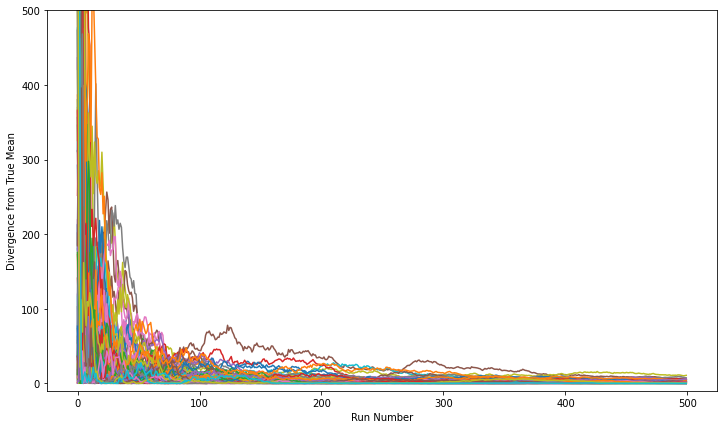

In [333]:
dfdivergence.plot(figsize = (12,7), legend=False) # This plot shows the divergence from the real mean for 100 runs of cumulative averaging. 
plt.ylim([-10,500])
plt.ylabel('Divergence from True Mean')
plt.xlabel('Run Number')
plt.show()